# 추측통계의 기본

## 4.0 준비

### 추측 통계에 대한 이해
- 일부 데이터를 수집해 전체 데이터를 추측할 수 있을까?
- 일부 관측 데이터와 전체 모집단의 대푯값들은 어떤 상관관계가 있을까?
- 표본의 분포를 이용해 모집단의 분포와 백분율을 예측할 수 있을까? 얼마나 정확할까?

- 추측 통계 : '일부' 데이터로부터 '전체'의 통계적 성질을 추측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('./sample_data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

## 4.1 모집단과 표본

### 0) 모집단과 표본
- 모집단 : 추측하고 싶은 관측 대상 전체
- 표본 : 추측에 사용하는 관측 대상의 일부분
- 표본크기 : 표본의 수
- 표본통계량(표본분산, 불편분산) --추정--> 모수(모평균, 모분산)

### 1) 표본의 추출방법
- 무작위 추출(임의 추출) : 임의로 표본을 선택 (편향이 일어나지 않음)
- 복원추출 : 동일한 표본 여러 차례 선택
```
np.random.choice(배열, 개수)
```
- 비복원추출 : 동일한 표본은 한 번만 선택
```
np.random.choice(배열, 개수, replace=False)
```
- 시드를 0으로 하는 무작위 추출 : 매번 동일한 결과
```
np.random.seed(0)
```
- 표본크기 있는 복원추출
```
np.random.choice(배열, 표본크기)
```

In [4]:
# 복원추출

np.random.choice([1, 2, 3], 3)

array([2, 3, 3])

In [5]:
# 비복원추출

np.random.choice([1, 2, 3], 3, replace=False)   # replace=False : 복원 없이

array([1, 3, 2])

In [7]:
# 시드 부여 -> 무작위 추출 시 동일한 결과가 나옴

np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [8]:
# 표본크기 20으로 복원추출

np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean()       # 표본평균 : 70.04

70.400

In [9]:
scores.mean()       # 모평균 : 69.53

69.530

In [10]:
# 무작위추출

for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 4.2 확률 모델

### 1) 확률의 기본
- 확률 : 무작위 추출과 같은 불확정을 수반한 '현상'을 해석





- 🌟🌟확률모형 : 무작위 추출 혹은 주사위를 '모델링'<br>
예) 주사위 확률 모형

- 🌟🌟확률변수 : 결과를 알아맞힐 수는 없지만, 취하는 값과 '그 값이 나올 확률'이 결정되어 있는 것<br>
예) 주사위 값이 나올 확률=1/6

- 확률분포 : 확률모형에 의해 결정된 확률변수가 나타내는 '분포'


- 시행 : 확률변수의 결과를 '관측'하는 것<br>
예) 주사위를 던지는 행위


- 실현값 : 시행에 의해 관측되는 '값'

- 사건 : 시행결과로 나타낼 수 있는 '값'<br>
예) 눈이 1이 되는 사건의 확률<br>
P(X=1) = 1/6 : 확률변수 X가 1일 확률은 1/6<br>
예) 눈이 홀수인 사건의 확률<br>
P((X=1) ∪ (X=3) ∪ (X=5)) = 1/6 + 1/6 + 1/6 = 1/2

- 근원사건 : 세부적으로 더 분해될 수 없는 사건<br>
예) 눈이 1 --> 더 이상 분해될 수 없음

- 상호배반 : 동시에 일어날 수 없는 사건<br>
예) 눈이 1 또는 2 또는 3 --> 일어날 수 없음

### 2) 확률분포
확률변수가 어떻게 움직이는지를 나타낸 것<br>
예) 불공정한 주사위의 시행

In [11]:
# 불공정한 주사위 : 눈에 따라 확률이 다름

dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21] # 다 더하면 1

In [20]:
np.random.choice(dice, p=prob)                          # 랜덤으로 눈 고르기

5

In [22]:
num_trial = 100                                         # 100번 시행
sample = np.random.choice(dice, num_trial, p=prob)      # 랜덤으로 눈 100번 고르기
sample

array([5, 5, 5, 4, 5, 4, 2, 6, 2, 1, 6, 3, 3, 3, 5, 6, 3, 6, 1, 6, 5, 3,
       6, 1, 5, 4, 6, 3, 6, 4, 6, 5, 5, 4, 5, 6, 6, 5, 5, 5, 3, 3, 6, 5,
       4, 4, 1, 5, 4, 5, 3, 4, 6, 1, 6, 5, 2, 4, 5, 6, 4, 3, 4, 6, 6, 6,
       5, 4, 5, 5, 1, 6, 5, 6, 4, 6, 4, 6, 5, 6, 6, 4, 4, 5, 5, 4, 5, 2,
       5, 4, 1, 2, 2, 4, 3, 5, 6, 5, 5, 3])

도수분포표와 히스토그램

In [23]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},           # sum/5
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,7,0.07
2,6,0.06
3,12,0.12
4,20,0.20
5,30,0.30
6,25,0.25


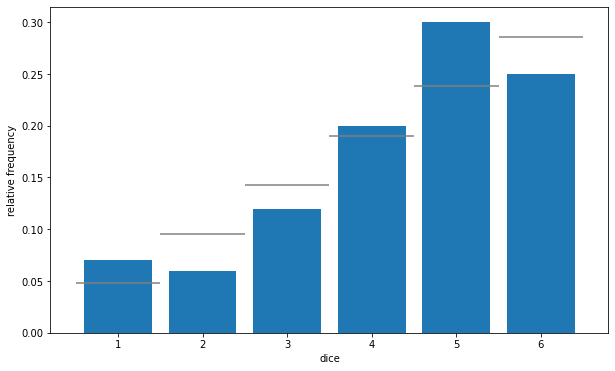

In [25]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)         # 불공정한 주사위
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')        # 공정한 주사위
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

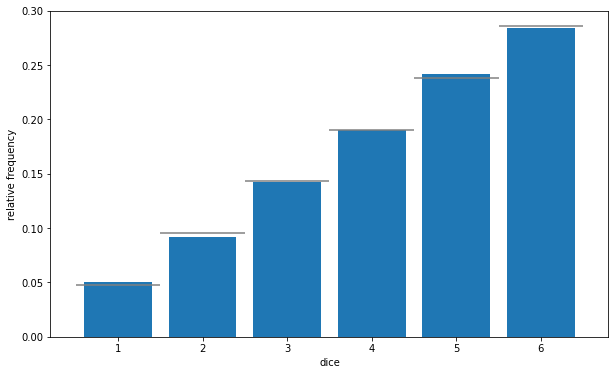

In [26]:
# 10000번 시행하면 히스토그램은 실제 확률분포에 가까워짐 -> 직선이 막대와 거의 일치
# --> 확률분포를 알면, 시행횟수를 높여서 모집단을 예측할 수 있다

num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 4.3 추측통계에서의 확률

무작위추출로 얻은 표본 데이터 얻어서 히스토그램 그리기<br>
--> 표본의 크기가 커질수록 실제 확률분포에 근사

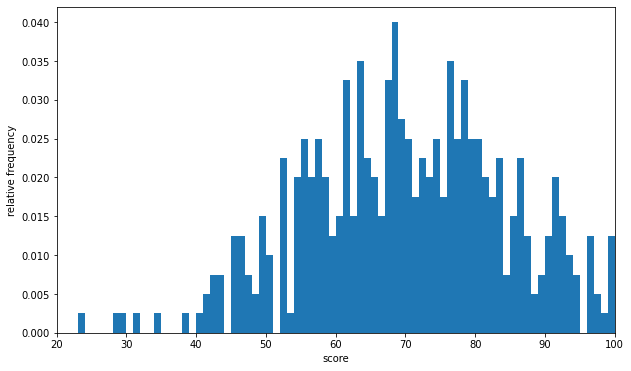

In [27]:
# 계급폭을 1점으로 하는 히스토그램

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

# 69점을 얻은 학생은 전교생의 0.04(4%)이므로
# 무작위 추출을 하면 4% 확률로 69점이라는 표본 데이터 획득

In [28]:
# 무작위추출로 얻은 표본 데이터

np.random.choice(scores)

91

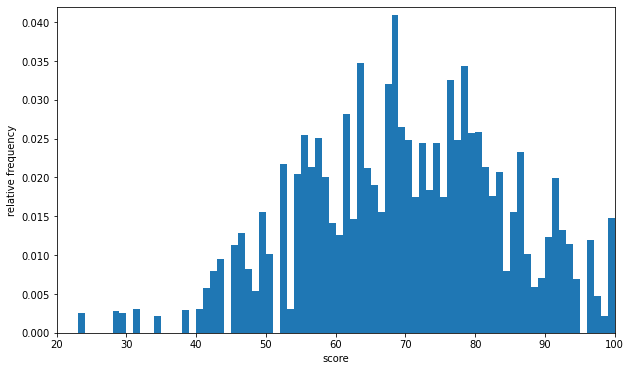

In [40]:
# 무작위추출로 표본크기가 10000인 표본 추출
# 시행횟수를 늘리면 상대도수는 실제 확률분포에 가까워짐
# --> 무작위추출에서도 표본크기가 커지면 표본 데이터의 상대도수는 실제의 확률분포에 근사

sample = np.random.choice(scores, 10000)    # scores에서 10000개 추출

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

# 히스토그램이 실제 점수 분포에 가까움
# --> 표본의 크기가 커지면 실제 분포에 수렴

69.3241
69.53


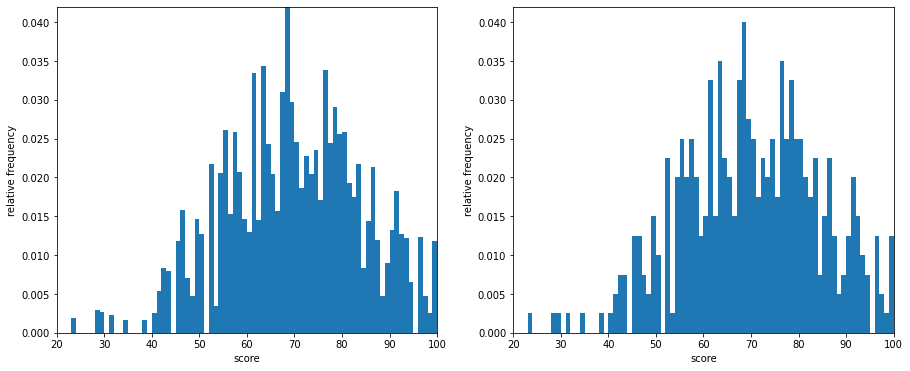

In [46]:
# 연습 - 한 번에 그리기

sample = np.random.choice(scores, 10000) #10000개 추출

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
print(np.mean(sample))

ax2 = fig.add_subplot(122)
ax2.hist(scores, bins=100, range=(0, 100), density=True)
ax2.set_xlim(20, 100)
ax2.set_ylim(0, 0.042)
ax2.set_xlabel('score')
ax2.set_ylabel('relative frequency')
print(np.mean(scores))
plt.show()

표본크기가 20인 표본 추출하여 표본평균 구하기<br>
--> 무작위추출에 의한 표본평균으로 모평균 추측 가능

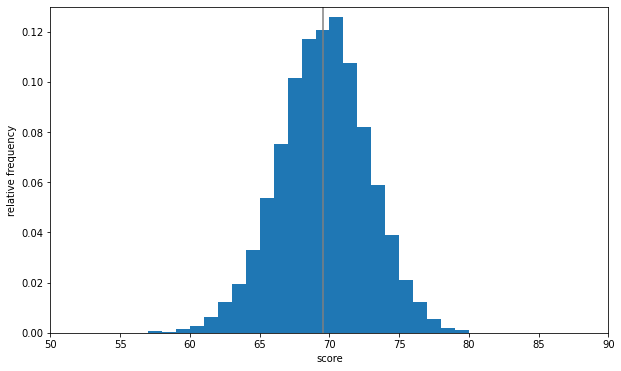

sample_means:  69.548845
mean:  69.53


In [38]:
# 표본크기가 20인 표본 추출하여 표본평균 구하기

sample_means = [np.random.choice(scores, 20).mean()     # 표본크기 20개로 표본평균 구하기
                for _ in range(10000)]                  # 10000번 시행

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

print('sample_means: ', np.mean(sample_means))          # 표본평균
print('mean: ', np.mean(scores))                        # 모평균